# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*numpy.sin(x)) - (((x**2)-2)*numpy.cos(x)) - 2.0

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [41]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    deltax = (xmax-xmin)/N
    h = deltax/2
    I = (deltax/6)*(f(xmin)+f(xmax))
    for i in range(1,N+1):
        I = I + ((deltax/6)*4*f((xmin+h)+((i-1)*deltax)))
    for i in range(1,N):
        I = I + ((deltax/6)*2*f(xmin+(i*deltax)))
    return I
print(integrate_numeric(xmin=0, xmax=4, N=1))
print(integrate_numeric(xmin=0, xmax=4, N=50))

1.6266126028560368
1.0965909955991107


Make sure you have implemented Simpson's rule correctly:

In [42]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [43]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"Fractional error in Simpson's rule for $x^2 sin(x)$ as N varies")

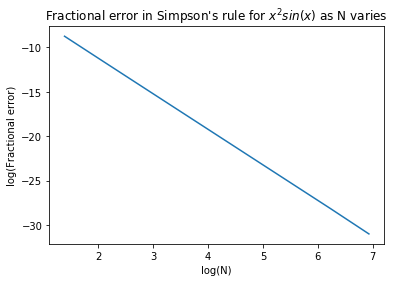

In [44]:
import math
import matplotlib.pyplot as plt
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
xvalues = numpy.log(panel_counts)
result_analytic = integrate_analytic(x0, x1)# Define reference value from analytical solution
frac_diff = []
for i in panel_counts:
    result_numeric = integrate_numeric(x0, x1, i)
    frac_diff.append((result_analytic - result_numeric)/result_analytic)
yvalues = numpy.log(frac_diff)
plt.plot(xvalues, yvalues, label="Simpson")
plt.xlabel("log(N)")
plt.ylabel("log(Fractional error)")
plt.title("Fractional error in Simpson's rule for $x^2 sin(x)$ as N varies")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The greater the number of panels, the greater the accuracy. However if the number of panels is too large then the computer cannot store all of the digits and so the numbers are rounded to inaccurate values.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule follows the same general trend (the greater the number of panels, the greater the accuracy) but is less accurate than Simpson's rule for small values of N. At very large values of N the trapezium rule becomes more accurate as there are less numerical rounding problems, as long as the function is smooth.